## Imports

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

## Constants

In [13]:
l = 0.0254      # m 
c = 1           # m/s
T = 0.25           # seconds

a = 0
b = 0.25
n = 200
dt = 10**-3

## Functions

In [3]:
def u_e(l, x, t):
    """
    Returns the exact solution of the wave function (CURRENTLY WRONG)
    """
    lamb = l/2
    w = c/lamb
    return np.sin(2*np.pi/lamb*x - w*t) * np.exp(-10*x)

In [4]:
def A_matrix(a, b, n, dt):
    """
    Returns the A matrix
    """
    x = np.linspace(a, b, n+1)
    dx = x[1] - x[0]
    cc = (c * dt / dx)**2
    A = cc * (np.eye(n-1, k=-1) - 2*np.eye(n-1) + np.eye(n-1, k=1))
    return A

In [5]:
def ivp_trap(a, b, n, dt, T, u_0):
    """
    Returns the approximated solution matrix using the trapezoid method
    """
    A = A_matrix(a, b, n, dt)
    time = np.arange(0, T + dt, dt)
    u = np.zeros([len(time), len(u_0)])
    for i in range(len(time)):
        if i == 0:
            u[0] = u_0
        if i > 0:
            denom = np.eye(A.shape[0]) - 0.5 * dt * A
            numer = u[i-1] + 0.5*dt*A@u[i-1]
            u[i] = np.linalg.solve(denom, numer)
#             print("Denom", denom)
#             print("Numer", numer)
    return u, time

In [6]:
# x = np.linspace(a, b, n+1)[1:n]
# u_0 = np.zeros(len(x)+1)
# y,t = ivp_trap(a, b, n, dt, T, u_0)

## Plotting

In [14]:
# initializing lists
x_list = []
u_list = []
ut_list = []
err_list = []

# filling lists
x = np.linspace(a, b, n+1)[1:n]
u_0 = u_e(l, x, 0)
u, time = ivp_trap(a, b, n, dt, T, u_0)
# ut = [u_e(l, x, time) for j in x]

x_list.append(x)
u_list.append(u[250])
# ut_list.append(ut)
# err_list.append(trap_error(u[500], ut))

Text(0.5, 1.0, 'n = 200')

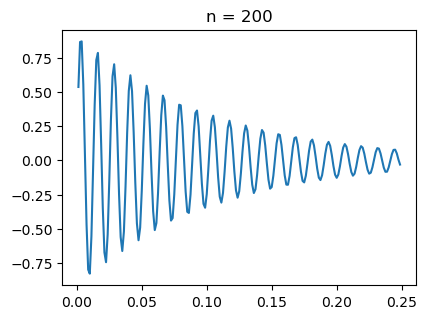

In [15]:
# plots
fig = plt.figure(figsize=(8, 6), tight_layout=True)

ax1 = fig.add_subplot(221)
ax1.plot(x_list[0], u_list[0])
# ax1.plot(x_list, ut_list, label = "u true")
ax1.set_title('n = 200')